In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

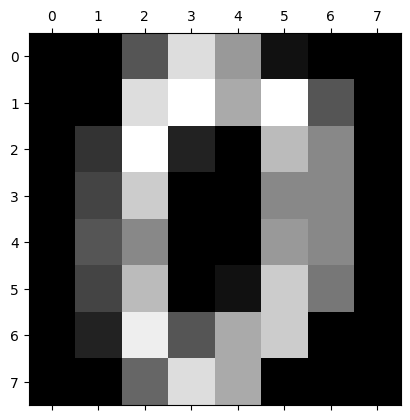

In [ ]:
plt.gray()
plt.matshow(digits.images[0])

In [ ]:
digits.target[0]

0

In [ ]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
X=df.drop('target',axis='columns')
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
len(X_train)

1257

In [ ]:
len(X_test)

540

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test,y_test)

0.9888888888888889

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors':[3,5,10,15,20]
},cv=5,return_train_score=False)

clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15, 20]})

In [ ]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011506,0.006091,0.081054,0.022312,3,{'n_neighbors': 3},0.968254,0.984127,0.980080,0.984064,0.996016,0.982508,0.008906,1
1,0.007612,0.003535,0.032219,0.008277,5,{'n_neighbors': 5},0.968254,0.976190,0.988048,0.972112,0.992032,0.979327,0.009187,2
2,0.010731,0.011514,0.109323,0.066300,10,{'n_neighbors': 10},0.956349,0.964286,0.984064,0.960159,0.980080,0.968988,0.011046,3
3,0.007403,0.003263,0.059869,0.039385,15,{'n_neighbors': 15},0.952381,0.952381,0.972112,0.956175,0.980080,0.962626,0.011368,4
4,0.004947,0.000727,0.027573,0.003322,20,{'n_neighbors': 20},0.944444,0.948413,0.968127,0.952191,0.972112,0.957057,0.011015,5


In [ ]:
clf.best_score_

0.9825080629861507

In [ ]:
clf.best_params_

{'n_neighbors': 3}

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]])

Text(95.72222222222221, 0.5, 'Truth')

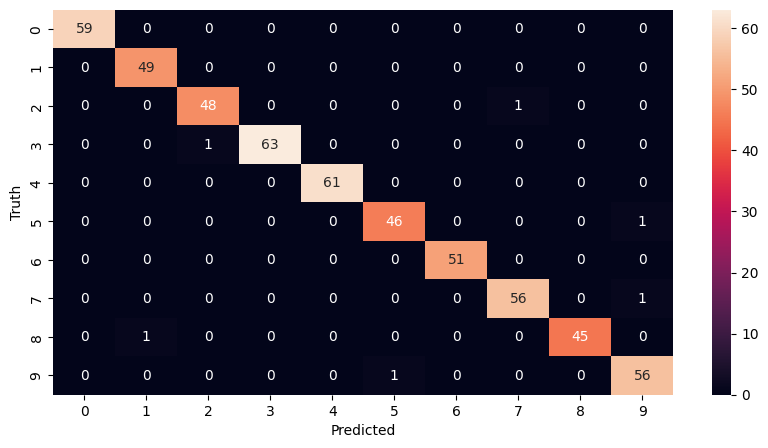

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.98      1.00      0.99        49
           2       0.98      0.98      0.98        49
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        61
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        51
           7       0.98      0.98      0.98        57
           8       1.00      0.98      0.99        46
           9       0.97      0.98      0.97        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

